In [1]:
import GTra as gtra

import scanpy as sc
import dill

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

DATA_PATH = Path("/data3/projects/2025_GTRA/data/1_MND")

#### Load data

In [2]:
# Load mouse neuron development
adata = sc.read_h5ad(DATA_PATH / "CCTSD_preproc.h5ad")
adata = adata[:,adata.var.highly_variable].copy()

#### Visualization (tSNE)

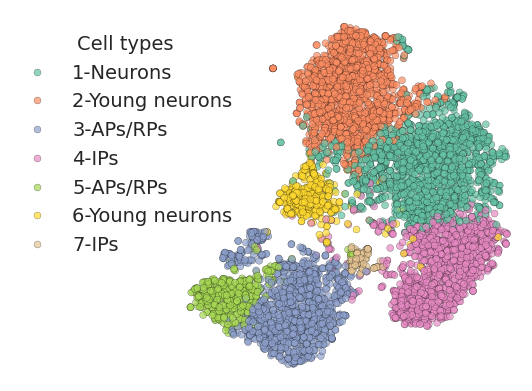

In [3]:
sns.set_context("paper")          # 글꼴·선 두께 자동 축소
sns.set_style("white")    

n_colors = adata.obs['cell_type2'].nunique()
cb_palette = sns.color_palette("Set2", n_colors)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

g1 = sns.scatterplot(data=adata.obs, x='tSNE_1', y='tSNE_2', hue='cell_type2', 
                     palette=cb_palette, s=25, linewidth=0.2,edgecolor='k', ax=axs, alpha=0.7,rasterized=True)

axs.axis("off")               # 축·눈금 제거
axs.legend(title="Cell types", prop={'size':14}, bbox_to_anchor=(-0.5, 0.98),title_fontsize=14,
               loc="upper left", frameon=False)
plt.tight_layout()
plt.show()

### Run GTra

##### Upload time-series scRNA-seq data

In [4]:
obj = gtra.GTraObject()
obj.params.cell_type_label = "cell_type2"
obj.params.output_dir = "./Case2_MND"
obj.params.output_name = "Mouse"

# Upload time-series scRNA_seq data
for time in sorted(adata.obs["timepoints"].unique()):
    dat = adata[adata.obs["timepoints"]==time]
    cnt_dat = dat.to_df(layer="counts")
    meta = dat.obs[[obj.params.cell_type_label]]
    obj.upload_time_scRNA(cnt_dat, meta)

# gtra.select_genes()

##### Step 1: Identifying cell type-specific gene clusters

In [5]:
obj.cc_clustering(N=10)

[Iter 4/10] Time 1/4 n_celltypes=7
[Iter 8/10] Time 1/4 n_celltypes=7
[Iter 3/10] Time 1/4 n_celltypes=7
[Iter 5/10] Time 1/4 n_celltypes=7
[Iter 10/10] Time 1/4 n_celltypes=7
[Iter 7/10] Time 1/4 n_celltypes=7
[Iter 1/10] Time 1/4 n_celltypes=7
[Iter 6/10] Time 1/4 n_celltypes=7
[Iter 9/10] Time 1/4 n_celltypes=7
[Iter 2/10] Time 1/4 n_celltypes=7
[Iter 6/10] Time 2/4 n_celltypes=7
[Iter 5/10] Time 2/4 n_celltypes=7
[Iter 4/10] Time 2/4 n_celltypes=7
[Iter 8/10] Time 2/4 n_celltypes=7
[Iter 9/10] Time 2/4 n_celltypes=7
[Iter 3/10] Time 2/4 n_celltypes=7
[Iter 7/10] Time 2/4 n_celltypes=7
[Iter 1/10] Time 2/4 n_celltypes=7
[Iter 10/10] Time 2/4 n_celltypes=7
[Iter 2/10] Time 2/4 n_celltypes=7
[Iter 6/10] Time 3/4 n_celltypes=7
[Iter 4/10] Time 3/4 n_celltypes=7
[Iter 8/10] Time 3/4 n_celltypes=7
[Iter 5/10] Time 3/4 n_celltypes=7
[Iter 2/10] Time 3/4 n_celltypes=7
[Iter 3/10] Time 3/4 n_celltypes=7
[Iter 9/10] Time 3/4 n_celltypes=7
[Iter 1/10] Time 3/4 n_celltypes=7
[Iter 7/10] Time 3

##### GTra's ranked edges

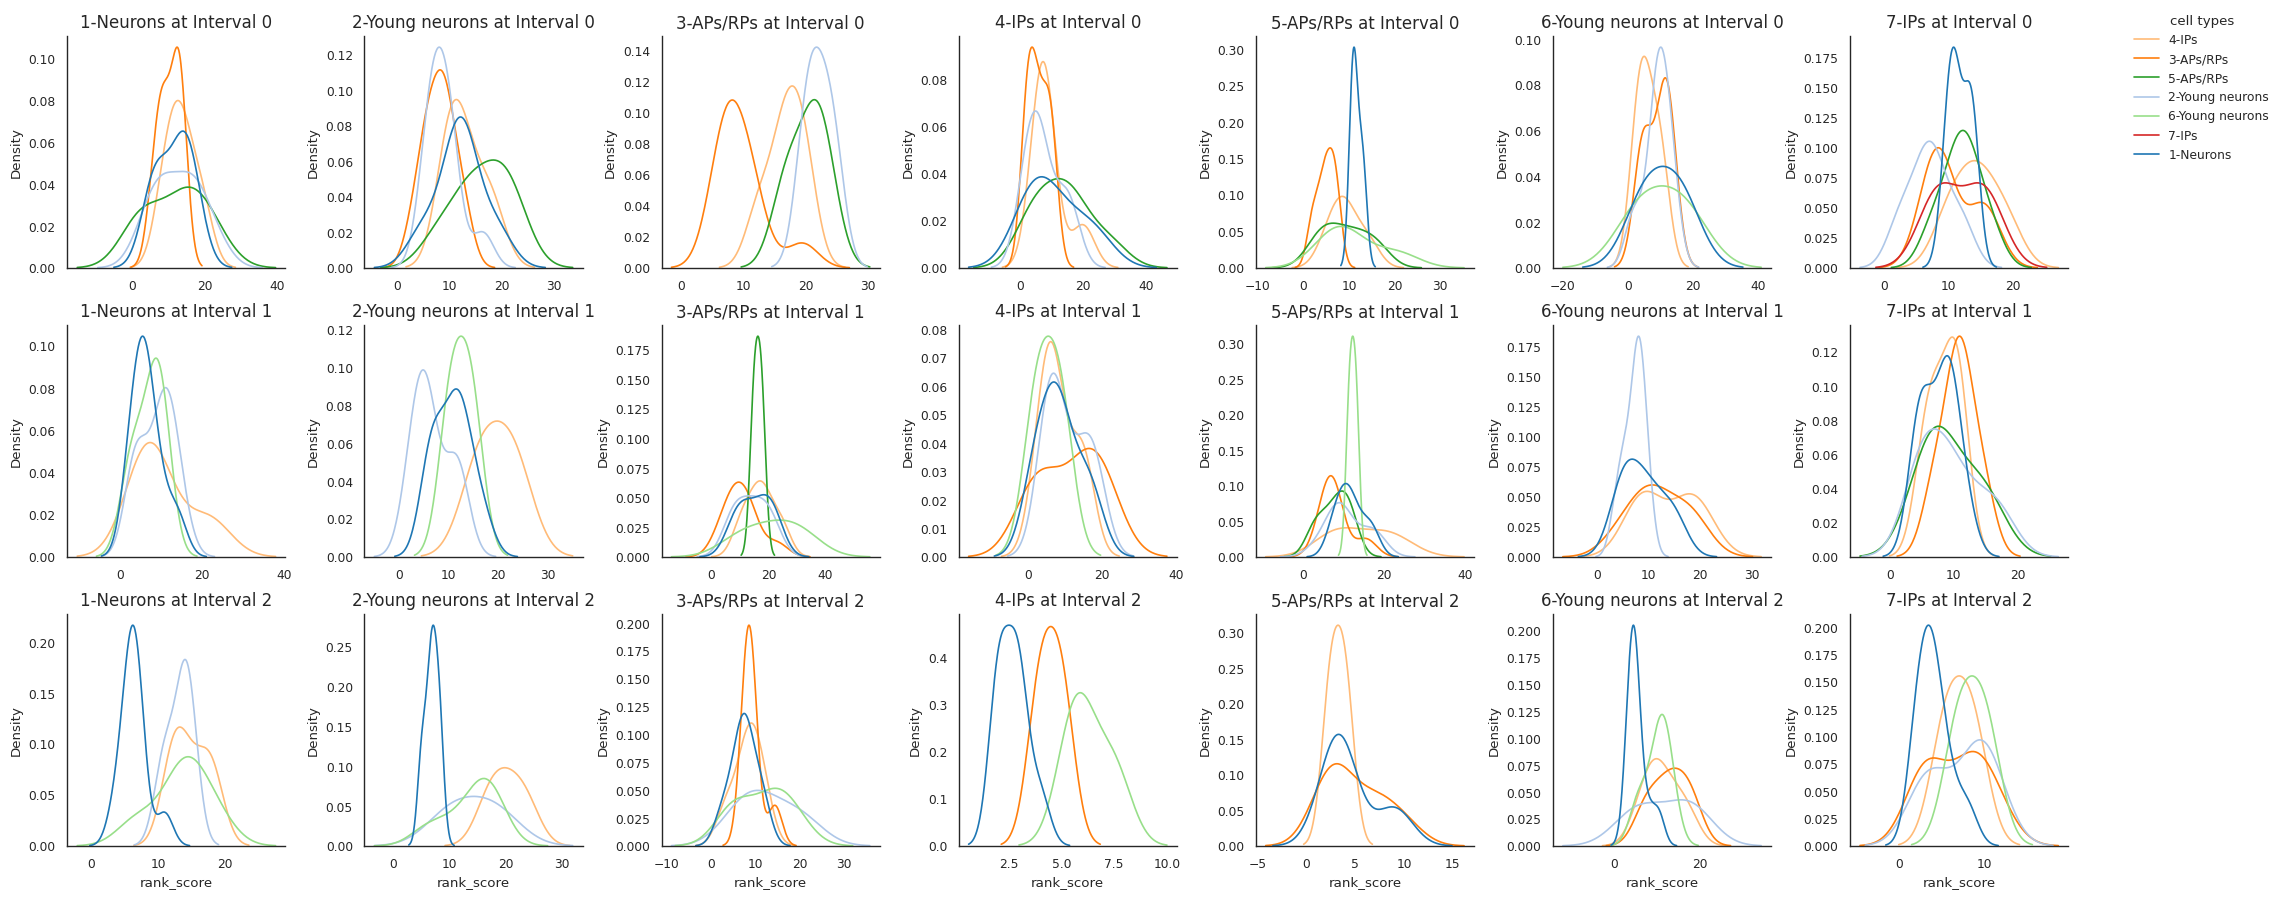

In [6]:
obj.plot_edge_stat()

##### Cell-state transition graph

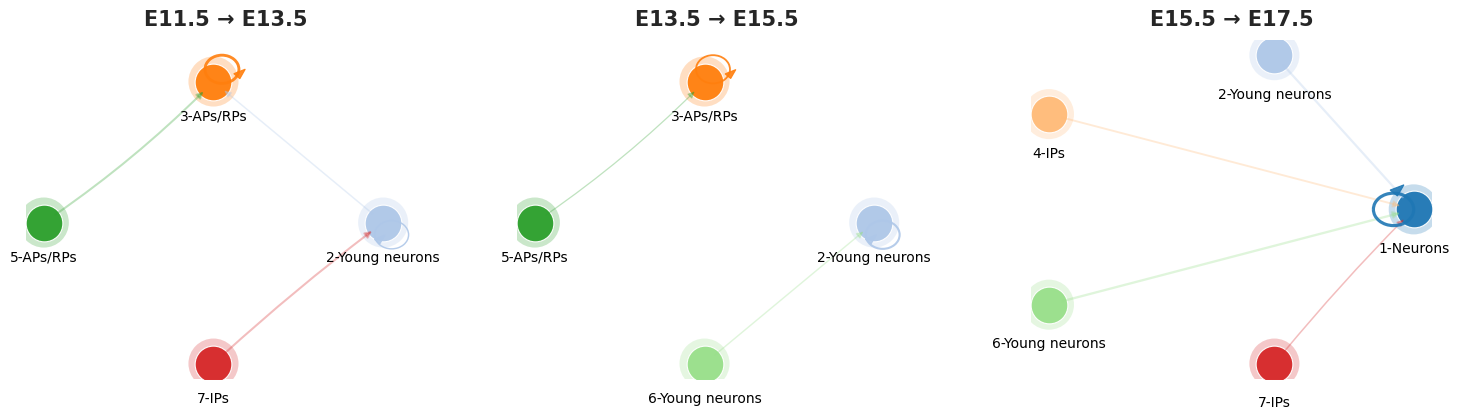

In [7]:
obj.params.time_point_label = ["E11.5","E13.5","E15.5","E17.5"]
obj.plot_transition_graph()

In [8]:
obj.pval_df

,Interval,source,target,p-value,adj_p-value
0,0,1-Neurons,1-Neurons,0.363147,0.834652
1,0,1-Neurons,2-Young neurons,0.649799,0.834652
2,0,1-Neurons,3-APs/RPs,0.152022,0.834652
3,0,1-Neurons,4-IPs,0.695544,0.834652
4,0,1-Neurons,5-APs/RPs,0.470026,0.834652
...,...,...,...,...,...
111,2,7-IPs,1-Neurons,0.009750,0.048750
112,2,7-IPs,2-Young neurons,0.867371,0.904642
113,2,7-IPs,3-APs/RPs,0.709921,0.904642
114,2,7-IPs,4-IPs,0.735653,0.904642


#### Step 2: Constructing cell-state trajectories

In [9]:
obj.select_candidate_edges()

Construct cell-state trajectories...: 100%|===========================| 3/3 [00:24<00:00,  8.25s/it]


#### Stpe 3: Detecting cell trajectory-specific gene expression patterns

In [10]:
obj.pattern_clustering()

AttributeError: 'list' object has no attribute 'rfind'